In [34]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats

In [23]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')

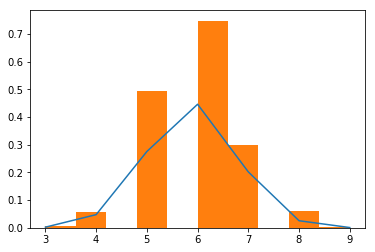

In [39]:
def visualise_labels(labels):
    sorted_data = sorted(labels)
    fit = stats.norm.pdf(sorted_data, np.mean(sorted_data), np.std(sorted_data))
    plt.plot(sorted_data, fit)
    plt.hist(sorted_data, normed=True)
    plt.show()
visualise_labels(white_labels)

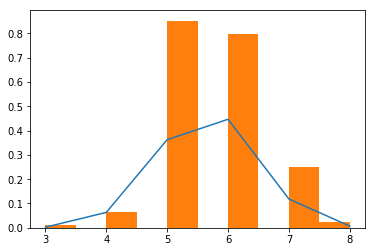

In [40]:
visualise_labels(red_labels)